In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
df=pd.read_csv("/content/sample_data/insurance_data.csv")

In [ ]:
df.isnull().sum()

index            0
PatientID        0
age              5
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           3
claim            0
dtype: int64

In [ ]:
updated_df = df
updated_df['age']=updated_df['age'].fillna(updated_df['age'].mean())
updated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          1340 non-null   int64  
 1   PatientID      1340 non-null   int64  
 2   age            1340 non-null   float64
 3   gender         1340 non-null   object 
 4   bmi            1340 non-null   float64
 5   bloodpressure  1340 non-null   int64  
 6   diabetic       1340 non-null   object 
 7   children       1340 non-null   int64  
 8   smoker         1340 non-null   object 
 9   region         1337 non-null   object 
 10  claim          1340 non-null   float64
dtypes: float64(3), int64(4), object(4)
memory usage: 115.3+ KB


In [ ]:
df['region'].fillna(df['region'].mode()[0],inplace=True)

In [ ]:
df.isnull().sum()

index            0
PatientID        0
age              0
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           0
claim            0
dtype: int64

<Axes: >

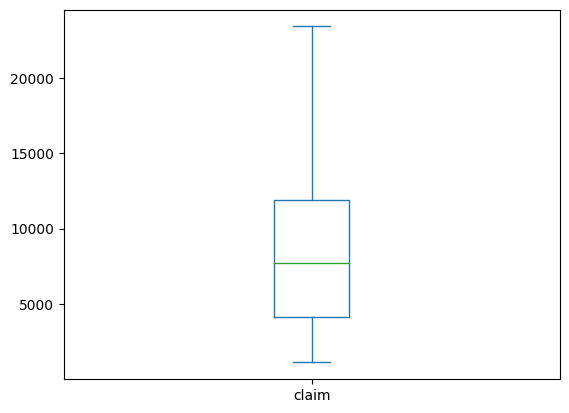

In [ ]:
df['claim'].plot(kind='box')

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

<ipython-input-19-638683b93e01>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
<ipython-input-19-638683b93e01>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)
<ipython-input-19-638683b93e01>:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]


In [ ]:
df_one_hot=pd.get_dummies(df)

In [ ]:
df_one_hot

,index,PatientID,age,bmi,bloodpressure,children,claim,gender_female,gender_male,diabetic_No,diabetic_Yes,smoker_No,smoker_Yes,region_northeast,region_northwest,region_southeast,region_southwest
0,0,1,39.000000,23.2,91,0,1121.87,0,1,0,1,1,0,0,0,1,0
1,1,2,24.000000,30.1,87,0,1131.51,0,1,1,0,1,0,0,0,1,0
2,2,3,38.078652,33.3,82,0,1135.94,0,1,0,1,1,0,0,0,1,0
3,3,4,38.078652,33.7,80,0,1136.40,0,1,1,0,1,0,0,1,0,0
4,4,5,38.078652,34.1,100,0,1137.01,0,1,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1113,1113,1114,23.000000,25.0,80,2,23241.47,0,1,0,1,1,0,1,0,0,0
1114,1114,1115,43.000000,22.9,84,1,23244.79,1,0,0,1,0,1,0,0,1,0
1115,1115,1116,59.000000,24.3,104,1,23288.93,1,0,1,0,1,0,1,0,0,0
1116,1116,1117,42.000000,25.6,106,2,23306.55,0,1,0,1,0,1,0,0,0,1


In [ ]:
X=df_one_hot.drop("claim",axis=1)
y=df_one_hot["claim"]

In [ ]:
#creating training and test data set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,
                                               random_state=42)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
X = MinMaxScaler().fit_transform(X)

In [ ]:
import tensorflow as tf
tf.random.set_seed(42)
#create a model
insurance_model=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
#compile the model
insurance_model.compile(
                         loss=tf.keras.losses.mae,
                         optimizer=tf.keras.optimizers.Adam(),
                         metrics=["mae"]
)
#fit the model
history=insurance_model.fit(X_train,y_train,epochs=100)

Epoch 1/100
23/23 [==============================] - 3s 4ms/step - loss: 7798.0522 - mae: 7798.0522
Epoch 2/100
23/23 [==============================] - 0s 4ms/step - loss: 6000.5947 - mae: 6000.5947
Epoch 3/100
23/23 [==============================] - 0s 4ms/step - loss: 3324.2341 - mae: 3324.2341
Epoch 4/100
23/23 [==============================] - 0s 3ms/step - loss: 1033.5485 - mae: 1033.5485
Epoch 5/100
23/23 [==============================] - 0s 3ms/step - loss: 839.0406 - mae: 839.0406
Epoch 6/100
23/23 [==============================] - 0s 2ms/step - loss: 801.6813 - mae: 801.6813
Epoch 7/100
23/23 [==============================] - 0s 2ms/step - loss: 776.2498 - mae: 776.2498
Epoch 8/100
23/23 [==============================] - 0s 2ms/step - loss: 768.5456 - mae: 768.5456
Epoch 9/100
23/23 [==============================] - 0s 3ms/step - loss: 758.5134 - mae: 758.5134
Epoch 10/100
23/23 [==============================] - 0s 2ms/step - loss: 752.5398 - mae: 752.5398
Epoch 11/10

In [ ]:
# Define a Sequential model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.05) ,input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

# Train the model with validation data
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val))

# Evaluate the model on the test data
loss, mae = model.evaluate(X_test, y_test)
print(f"Mean Squared Error: {loss:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")

Epoch 1/100
23/23 [==============================] - 1s 18ms/step - loss: 102999592.0000 - mean_absolute_error: 8595.7568 - val_loss: 107240376.0000 - val_mean_absolute_error: 8777.4209
Epoch 2/100
23/23 [==============================] - 0s 7ms/step - loss: 101168336.0000 - mean_absolute_error: 8516.3887 - val_loss: 105393264.0000 - val_mean_absolute_error: 8698.0186
Epoch 3/100
23/23 [==============================] - 0s 7ms/step - loss: 99468848.0000 - mean_absolute_error: 8441.4346 - val_loss: 103698536.0000 - val_mean_absolute_error: 8624.1768
Epoch 4/100
23/23 [==============================] - 0s 5ms/step - loss: 97862080.0000 - mean_absolute_error: 8369.1846 - val_loss: 102018968.0000 - val_mean_absolute_error: 8549.5967
Epoch 5/100
23/23 [==============================] - 0s 4ms/step - loss: 96179024.0000 - mean_absolute_error: 8293.2549 - val_loss: 100276560.0000 - val_mean_absolute_error: 8471.0439
Epoch 6/100
23/23 [==============================] - 0s 5ms/step - loss: 9452

In [ ]:
import tensorflow as tf
from tensorflow.keras.callbacks import History

# Create an instance of History callback to collect training history
history = History()

# Define and compile your model
model = tf.keras.Sequential([
    # ... Your model architecture here ...
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model with the history callback
history = model.fit(X_train, y_train, epochs=100)

# Extract training and validation loss from the history object
training_loss = history.history['loss']

Epoch 1/100
23/23 [==============================] - 0s 2ms/step - loss: 100752912.0000 - mae: 8478.0469
Epoch 2/100
23/23 [==============================] - 0s 2ms/step - loss: 100752920.0000 - mae: 8478.0479
Epoch 3/100
23/23 [==============================] - 0s 2ms/step - loss: 100752912.0000 - mae: 8478.0469
Epoch 4/100
23/23 [==============================] - 0s 2ms/step - loss: 100752920.0000 - mae: 8478.0479
Epoch 5/100
23/23 [==============================] - 0s 2ms/step - loss: 100752920.0000 - mae: 8478.0469
Epoch 6/100
23/23 [==============================] - 0s 2ms/step - loss: 100752920.0000 - mae: 8478.0479
Epoch 7/100
23/23 [==============================] - 0s 2ms/step - loss: 100752920.0000 - mae: 8478.0479
Epoch 8/100
23/23 [==============================] - 0s 2ms/step - loss: 100752920.0000 - mae: 8478.0479
Epoch 9/100
23/23 [==============================] - 0s 2ms/step - loss: 100752912.0000 - mae: 8478.0479
Epoch 10/100
23/23 [==============================] - 0

Epoch 1/100
23/23 [==============================] - 0s 9ms/step - loss: 100752912.0000 - mae: 8478.0469 - val_loss: 105950432.0000 - val_mae: 8701.8564
Epoch 2/100
23/23 [==============================] - 0s 4ms/step - loss: 100752920.0000 - mae: 8478.0479 - val_loss: 105950432.0000 - val_mae: 8701.8564
Epoch 3/100
23/23 [==============================] - 0s 3ms/step - loss: 100752912.0000 - mae: 8478.0469 - val_loss: 105950432.0000 - val_mae: 8701.8564
Epoch 4/100
23/23 [==============================] - 0s 4ms/step - loss: 100752920.0000 - mae: 8478.0479 - val_loss: 105950432.0000 - val_mae: 8701.8564
Epoch 5/100
23/23 [==============================] - 0s 4ms/step - loss: 100752920.0000 - mae: 8478.0469 - val_loss: 105950432.0000 - val_mae: 8701.8564
Epoch 6/100
23/23 [==============================] - 0s 3ms/step - loss: 100752920.0000 - mae: 8478.0479 - val_loss: 105950432.0000 - val_mae: 8701.8564
Epoch 7/100
23/23 [==============================] - 0s 4ms/step - loss: 100752920

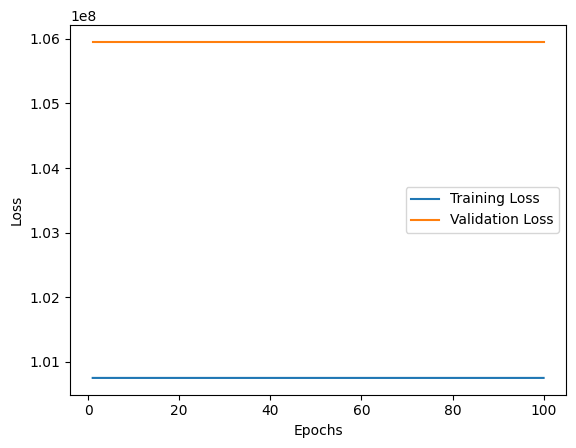

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score

# Create a History callback to collect training history
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val))

# Collect training and validation loss values from history
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Plot training and validation loss
epochs = range(1, len(training_loss) + 1)
plt.plot(epochs, training_loss, label='Training Loss')
plt.plot(epochs, validation_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.neural_network import MLPRegressor

# Define your model
model = MLPRegressor(max_iter=1000,learning_rate_init=0.8, random_state=42)

# Define a range of hyperparameter values to search
param_grid = {
    'hidden_layer_sizes': [(30,20), (100,50,30), (200,100,50)],
    'batch_size': [16, 32, 64, 128],
    'alpha': [10.0,100.0,1000.0],
}

# Define the number of cross-validation folds
n_folds = 5

# Define a scoring metric (e.g., Mean Squared Error)
scorer = make_scorer(mean_squared_error)

# Create a KFold object for cross-validation
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(model, param_grid, scoring=scorer, cv=kf, verbose=1)

# Fit the GridSearchCV object to your data
grid_search.fit(X, y)

# Get the best hyperparameters from the search
best_hidden_layer_sizes = grid_search.best_params_['hidden_layer_sizes']
best_batch_size = grid_search.best_params_['batch_size']
best_alpha = grid_search.best_params_['alpha']
best_score = grid_search.best_score_

print(f'Best Hidden Layer Sizes: {best_hidden_layer_sizes}')
print(f'Best Batch Size: {best_batch_size}')
print(f'Best Alpha: {best_alpha}')
print(f'Best Mean Squared Error: {best_score}')

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Hidden Layer Sizes: (100, 50, 30)
Best Batch Size: 16
Best Alpha: 100.0
Best Mean Squared Error: 16604623.733819183


In [ ]:
best_alpha = 100.0
best_batch_size = 16
best_hidden_layer_sizes = (100, 50, 30)
model = MLPRegressor(
    hidden_layer_sizes=(100,50,30),  # Your chosen hidden layer sizes
    alpha=best_alpha,
    max_iter=2000,
    random_state=42,
    early_stopping=True,        # Enable early stopping
    n_iter_no_change=10,       # Number of iterations with no improvement before stopping
)
model.fit(X_train, y_train)
y_pred_val=model.predict(X_val)
r_squared_val = r2_score(y_val, y_pred_val)
print(f'Validation R-squared Score: {r_squared_val}')

Validation R-squared Score: 0.9700463202984729


In [ ]:
best_alpha = 100.0
best_batch_size = 16
best_hidden_layer_sizes = (100, 50, 30)
model = MLPRegressor(
    hidden_layer_sizes=(100,50,30),  # Your chosen hidden layer sizes
    alpha=best_alpha,
    max_iter=2000,
    random_state=42,
    early_stopping=True,        # Enable early stopping
    n_iter_no_change=10,       # Number of iterations with no improvement before stopping
)
model.fit(X_train, y_train)
y_pred_test=model.predict(X_test)
r_squared_test = r2_score(y_test, y_pred_test)
print(f'testing R-squared Score: {r_squared_test}')

testing R-squared Score: 0.9831007292485577


In [ ]:
best_alpha = 100.0
best_batch_size = 16
best_hidden_layer_sizes = (100, 50, 30)
model = MLPRegressor(
    hidden_layer_sizes=(100,50,30),  # Your chosen hidden layer sizes
    alpha=best_alpha,
    max_iter=2000,
    random_state=42,
    early_stopping=True,        # Enable early stopping
    n_iter_no_change=10,       # Number of iterations with no improvement before stopping
)
model.fit(X_train, y_train)
y_pred_train=model.predict(X_train)
r_squared_train = r2_score(y_train, y_pred_train)
print(f'training R-squared Score: {r_squared_train}')

training R-squared Score: 0.9801734284272754


In [ ]:
#PREDICTION FOR NEW PATIENT
import numpy as np
import tensorflow as tf

# Define the feature values for the new patient as a dictionary
new_patient_data = {
    'index': 0,
    'PatientID': 456,
    'age': 40,
    'gender_male': 1,
    'gender_female': 0,# Use one-hot encoded 'sex' (1 for female, 0 for male)
    'bmi': 50.20,
    'bloodpressure':60,
    'diabetic_Yes':1,
    'diabetic_No': 0,
    'children': 3,
    'smoker_Yes': 1,
    'smoker_No':0,# Use one-hot encoded 'smoker' (1 for smoker, 0 for non-smoker)
    'region_northeast': 0,
    'region_northwest': 0,
    'region_southeast':1,
    'region_southwest':0

}

# Create a DataFrame from the dictionary
import pandas as pd
new_patient_df = pd.DataFrame(new_patient_data, index=[0])

# Make predictions for the new patient
predicted_charges = insurance_model.predict(new_patient_df)

# Display the predicted insurance charges
predicted_charge_for_new_patient = predicted_charges[0][0]
print(f'Predicted Insurance Charges for New Patient: ${predicted_charge_for_new_patient:.2f}')

1/1 [==============================] - 0s 23ms/step
Predicted Insurance Charges for New Patient: $402.75


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
rf = RandomForestRegressor(n_estimators=100, random_state=42)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)

rmse = mean_squared_error(y_test, y_pred, squared=False)

r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print('R-squared score:', r2)

Mean Absolute Error: 31.90878783783743
Root Mean Squared Error: 73.74942028090584
R-squared score: 0.9998169024613086


In [ ]:
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters:  {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best score:  0.999782335929926


In [ ]:
best_rf = RandomForestRegressor(**grid_search.best_params_, random_state=42)
best_rf.fit(X_train, y_train)

y_pred = best_rf.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)

rmse = mean_squared_error(y_test, y_pred, squared=False)

r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print('R-squared score:', r2)

Mean Absolute Error: 31.756498458751008
Root Mean Squared Error: 74.66521016619595
R-squared score: 0.9998123269688678


In [ ]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Create a RandomForest model
rf_model = RandomForestRegressor()

# Fit the model to your data
rf_model.fit(X,y)  # Use your full feature set (X) and target variable (y)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Get feature names (assuming X is a DataFrame with column names)
new_feature_names = ['age', 'gender', 'bmi', 'bloodpressure', 'diabetic', 'smoker']

# Sort features by importance
sorted_feature_importance = sorted(zip(new_feature_names, feature_importances), key=lambda x: x[1], reverse=True)

# Unpack feature names and importances
new_feature_names, feature_importances = zip(*sorted_feature_importance)

In [ ]:
sorted_feature_importance

[('age', 0.5535281485597602),
 ('gender', 0.44641991363023587),
 ('bloodpressure', 1.2084362281723036e-05),
 ('bmi', 1.1864457306986675e-05),
 ('diabetic', 7.1858113275037246e-06),
 ('smoker', 2.9606802798086514e-06)]

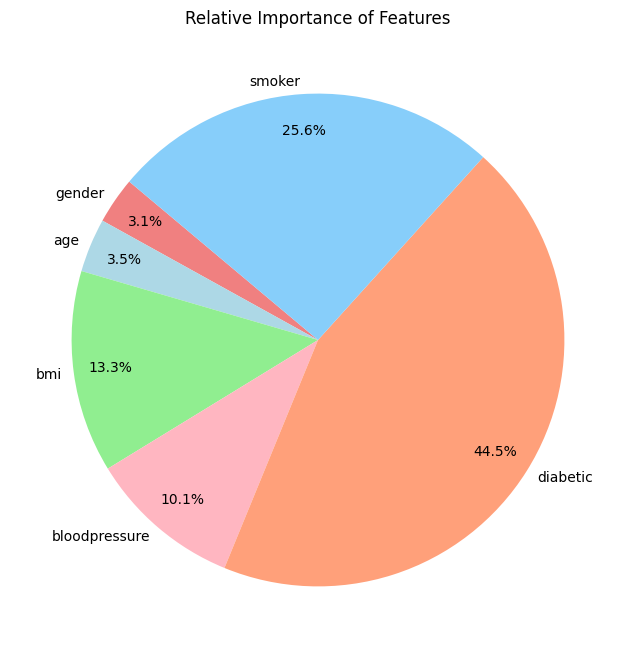

In [ ]:
import matplotlib.pyplot as plt

# Feature names and their importances
feature_names = ['gender', 'age', 'bmi', 'bloodpressure', 'diabetic', 'smoker']
importances = [0.46, 0.53, 1.99, 1.51, 6.68, 3.84]

# Define a custom color palette
colors = ['lightcoral', 'lightblue', 'lightgreen', 'lightpink', 'lightsalmon', 'lightskyblue']

# Create a pie chart for feature importances using the custom color palette
plt.figure(figsize=(8, 8))
plt.pie(importances, labels=feature_names, autopct='%1.1f%%', startangle=140, pctdistance=0.85, labeldistance=1.05, colors=colors)
plt.title('Relative Importance of Features')
plt.show()

In [ ]:
X

array([[0.00000000e+00, 0.00000000e+00, 5.00000000e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [8.95255148e-04, 8.95255148e-04, 1.42857143e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.79051030e-03, 1.79051030e-03, 4.78063135e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       ...,
       [9.98209490e-01, 9.98209490e-01, 9.76190476e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.99104745e-01, 9.99104745e-01, 5.71428571e-01, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 1.00000000e+00, 1.90476190e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

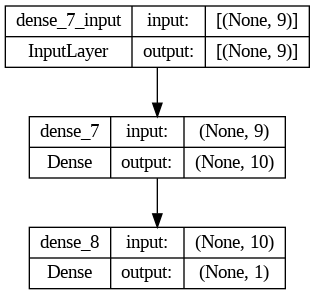

In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model

# Define your model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(9,)),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

# Visualize the model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

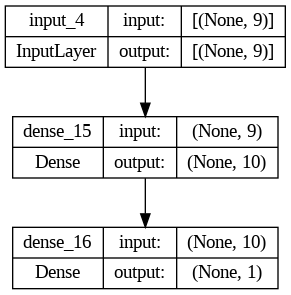

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from graphviz import Digraph

# Define your model
inputs = Input(shape=(9,))
x = Dense(10, activation='relu')(inputs)
outputs = Dense(1)(x)
model = Model(inputs=inputs, outputs=outputs)

# Create a new graph
dot = Digraph()

# Add input layer nodes
for feature in range(9):
    dot.node(f'Input_{feature}', label=f'Input_{feature}')

# Add hidden layer nodes
for i in range(10):  # Number of hidden layer nodes
    dot.node(f'Hidden_{i}', label=f'Hidden_{i}')

# Add output layer node
dot.node('Output', label='Output')

# Connect the nodes with edges
for feature in range(9):
    dot.edge(f'Input_{feature}', 'Hidden_0')  # Connect input to the first hidden layer node

for i in range(10):
    dot.edge(f'Hidden_{i}', 'Output')  # Connect hidden layer to the output layer

# Save the graph to a file
dot.render('neural_network', view=True)
# Save the visualization of the model as an image
plot_model(model, to_file='neural_network.png', show_shapes=True, show_layer_names=True)

# Display the image in the notebook
from IPython.display import Image
Image('neural_network.png')

In [ ]:
!pip install pydot

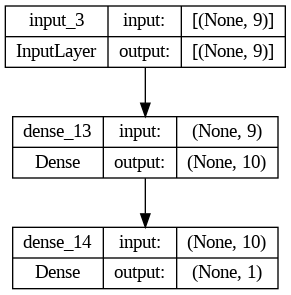

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model

# Define your model
inputs = Input(shape=(9,))
x = Dense(10, activation='relu')(inputs)
outputs = Dense(1)(x)
model = Model(inputs=inputs, outputs=outputs)

# Save the visualization of the model as an image
plot_model(model, to_file='neural_network.png', show_shapes=True, show_layer_names=True)

# Display the image in the notebook
from IPython.display import Image
Image('neural_network.png')

In [ ]:
!pip install tensorboard